# 2 {-}

# c) {-}

In [1]:
import numpy as np
from numpy.random import exponential
import pandas as pd
import matplotlib.pyplot as plt

$W_i$ for $i > 0$ can be written as:

$$W_i = \max(0, D_{i-1}-A_i)$$
$$W_i = \max(0, \sum_{k=1}^{i-1}T_k + V_{i-1} + W_{i-1} - \sum_{k=1}^{i}T_k)$$
$$W_i = \max(0, V_{i-1} + W_{i-1} - T_i)$$



In [2]:
def WaitingTimes(n, l, m):
    """Samples the waiting times of the first n customers.

    Args:
        n: Number of customers.
        l: Inter arrival times distribution parameter.
        m: Services times distribution parameter.
    Returns:
        List of length n.
        
    """
    
    # numpy.random.exponential uses beta=1/lambda as the form of the rate parameter
    inter_arrival_times = exponential(scale=1/l, size=n)
    service_times = exponential(scale=1/m, size=n)
    
    waiting_times = [0]
    
    for i in range(1, n):
        waiting_times.append(max(0, service_times[i-1]-inter_arrival_times[i]+waiting_times[i-1])) 
    
    return waiting_times

In [3]:
WaitingTimes(10, 1, 1)

[0,
 0,
 0,
 0.29566123078303397,
 0,
 0,
 1.085997103948855,
 0.9872421633511141,
 0.9759435360988478,
 1.5744057305144818]

# d) {-}

In [4]:
def plotQueue(t, l, m):
    """Simulates a queue and plots X(t) up to time t.
    
    Args:
        n: Number of customers.
        l: Inter arrival times distribution parameter.
        m: Services times distribution parameter.
        
    """
    # initializing for first customer
    inter_arrivals = [exponential(1/l, 1).item()]
    service = [exponential(1/m, 1).item()] 
    arrivals = [inter_arrivals[-1]]
    waiting = [0]
    departures = [arrivals[-1] + service[-1]]
    
    # appending for subsequent customers until 
    # arrival time > given t 
    while arrivals[-1] <= t:
        inter_arrivals.append(exponential(1/l, 1).item())
        service.append(exponential(1/m, 1).item())
        arrivals.append(arrivals[-1] + inter_arrivals[-1])
        waiting.append(max(0, departures[-1] - arrivals[-1]))
        departures.append(arrivals[-1] + service[-1] + waiting[-1])
    
    df = pd.DataFrame({'time': np.arange(0, t+min(inter_arrivals), min(inter_arrivals))})
    df['x_t'] = df['time'].map(lambda t: len(list(filter(lambda x: x <= t, arrivals))) 
                               - len(list(filter(lambda x: x <= t, departures))))
    plt.figure(figsize=(8, 5))
    plt.step(df['time'], df['x_t'])
    plt.title('Queue Simulation')
    plt.xlabel('Time')
    plt.ylabel('X(t)')
    plt.show()

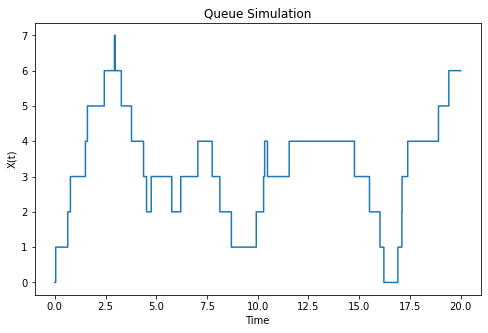

In [18]:
plotQueue(20, 1, 1)

# e) {-}

Use Monte Carlo to estimate $\mathbb{P}[W_2 \ge 1]$:

We can let $H = \mathbb{I}_{[W_2 \ge 1]}$ so that $\mathbb{E}[H] = \mathbb{P}[W_2 \ge 1]$. And use Monte Carlo with $N$ simulations to estimate $\mathbb{E}[H]$ with $\frac{1}{N}\sum_{i=1}^{N}\mathbb{I}_{w_2^{(i)} \ge 1}$.

In [6]:
n = 100000
waiting_times_2 = [WaitingTimes(2, 1, 1)[-1] for _ in range(n)]
estimate = np.mean([w2 >= 1 for w2 in waiting_times_2])
estimate 

0.18143

The exact value of $\mathbb{P}[W_2 \ge 1]$ is $\frac{\lambda e^{-\mu c}}{\lambda + \mu}$ for corresponding values $\lambda, \mu, c$ (from 2.a).

In [7]:
def prob_waiting(l, m, c):
    return(l*np.exp(-m*c)/(l+m))

In [8]:
prob_waiting(1, 1, 1)

0.18393972058572117

In [9]:
print(f"The exact value of 0.1839 and our estimate via Monte Carlo of {estimate} are very close.")

The exact value of 0.1839 and our estimate via Monte Carlo of 0.18143 are very close.


//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


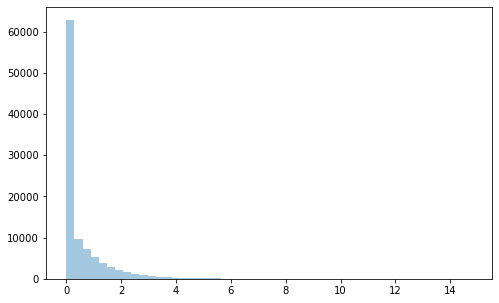

In [10]:
# histogram with the sampled waiting times for person 2, since we have them available
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.distplot(waiting_times_2, kde=False)
plt.show()

Use Monte Carlo to estimate $\mathbb{P}[W_{100} \ge 1]$:

We can let $H = \mathbb{I}_{[W_{100} \ge 1]}$ so that $\mathbb{E}[H] = \mathbb{P}[W_{100} \ge 1]$. And use Monte Carlo with $N$ simulations to estimate $\mathbb{E}[H]$ with $\frac{1}{N}\sum_{i=1}^{N}\mathbb{I}_{w_{100}^{(i)} \ge 1}$.

In [11]:
n = 100000
waiting_times_100 = [WaitingTimes(100, 1, 1)[-1] for _ in range(n)]
np.mean([w100 >= 1 for w100 in waiting_times_100])

0.88766

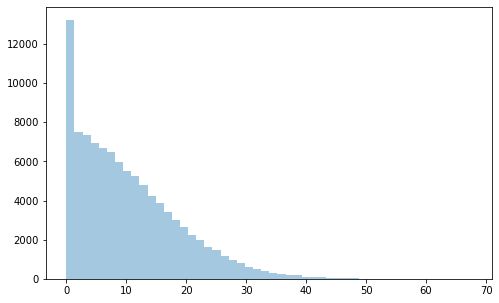

In [12]:
# histogram with the sampled waiting times for person 100, since we have them available
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.distplot(waiting_times_100, kde=False)
plt.show()

# 3 {-}

# a) {-}

Suppose the coordinates of $X$ are independent. <br>
Let $i, j$ be indices of the covariance matrix $\Sigma$ and $i \neq j$. Since $X_i, X_j$ are independent we have that $E(X_iX_j)=E(X_i)E(X_j)$. <br>
So, 
$$\Sigma_{ij} = 
\text{cov}(X_i, X_j) = E(X_iX_j)-E(X_i)E(X_j)=E(X_i)E(X_j)-E(X_i)E(X_j)=0$$  <br> 
$\implies$ $\Sigma$ is diagonal.

Now suppose $\Sigma = \text{diag}(\sigma_1^2, \sigma_2^2, ..., \sigma_n^2)$. <br>
Then, 
$$\det(\Sigma)=\prod_{i=1}^{n}\sigma_i^2$$
$$\Sigma^{-1}=\text{diag}(\frac{1}{\sigma_1^2}, \frac{1}{\sigma_2^2}, ..., \frac{1}{\sigma_n^2})$$

$$f_X(x) = \frac{1}{(2\pi)^{\frac{n}{2}}\prod_{i=1}^{n}\sigma_i^2}\exp \{-{\frac{(x-\mu)^T\text{diag}(\frac{1}{\sigma_1^2}, \frac{1}{\sigma_2^2}, ..., \frac{1}{\sigma_n^2})(x-\mu)}{2}}\}$$

$$= \frac{1}{\prod_{i=1}^{n}(2\pi)^{\frac{1}{2}}\sigma_i^2}\exp \{-\sum_{i=1}^{n}\frac{(x_i-\mu_i)^2}{2\sigma_i^2}
\}$$

$$= \frac{1}{\prod_{i=1}^{n}(2\pi)^{\frac{1}{2}}\sigma_i^2}
\prod_{i=1}^{n}\exp \{-\frac{(x_i-\mu_i)^2}{2\sigma_i^2}
\}$$

$$=\prod_{i=1}^{n}\frac{1}{(2\pi)^{\frac{1}{2}}\sigma_i^2}\exp \{-\frac{(x_i-\mu_i)^2}{2\sigma_i^2} \}$$

The last equation is simply the product of $n$ Gaussian densities, $X_i \sim N(\mu_i, \sigma_i^2).$ So since we can express the joint distribution as a product of the marginal distributions, i.e.,

$$f_{X}(x) = f_{(X_1, X_2, ..., X_n)}(x_1, x_2, ..., x_n) = f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$$

we have that the coordinates of $X$ are independent. 



# b) {-}

Broadly, consider the pdf of a multivariate normal $X \in \mathbb{R}^n$ with a diagonal covariance matrix.

$$f_X(x) = \frac{1}{(2\pi)^{\frac{n}{2}}\prod_{i=1}^{n}\sigma_i^2}\exp \{-{\frac{(x-\mu)^T\text{diag}(\frac{1}{\sigma_1^2}, \frac{1}{\sigma_2^2}, ..., \frac{1}{\sigma_n^2})(x-\mu)}{2}}\}$$

Now let us consider the level set consisting of all points $x_1, x_2, ..., x_n \in \mathbb{R}$ for which $f_X(x) = c.$

$$c = \frac{1}{(2\pi)^{\frac{n}{2}}\prod_{i=1}^{n}\sigma_i^2}\exp \{-{\frac{(x-\mu)^T\text{diag}(\frac{1}{\sigma_1^2}, \frac{1}{\sigma_2^2}, ..., \frac{1}{\sigma_n^2})(x-\mu)}{2}}\}$$

$$2\log{\frac{1}{c(2\pi)^{\frac{n}{2}}\prod_{i=1}^{n}\sigma_i^2}}=(x-\mu)^T\text{diag}(\frac{1}{\sigma_1^2}, \frac{1}{\sigma_2^2}, ..., \frac{1}{\sigma_n^2})(x-\mu)$$

The above is the equation of a hyper-ellipse.

More specifically, when $n=2$ we have:

$$2\log{\frac{1}{c(2\pi)\sigma_1^2\sigma_2^2}}=(x-\mu)^T\text{diag}(\frac{1}{\sigma_1^2}, \frac{1}{\sigma_2^2})(x-\mu)$$

$$2\log{\frac{1}{c(2\pi)\sigma_1^2\sigma_2^2}}=(\frac{x_1-\mu_1}{\sigma_1})^2+(\frac{x_2-\mu_2}{\sigma_2})^2$$

And we have the equation of an ellipse aligned with the coordinate axes and centered at $\mu$ with major and minor axis length in a $\sigma_1:\sigma_2$ ratio. 

And so, as we let $\sigma_1 \to 0$, the length of the $x_1$-axis approaches 0 as well and the level curves approach "lines" parallel to the $x_2$-axis. Similarly, as we let $\sigma_2 \to 0$, the length of the $x_2$-axis approaches 0 and the level curves approach "lines" parallel to the $x_1$-axis.

We can test the above with plots.

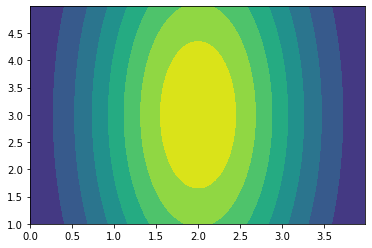

In [13]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import contourf

x, y = np.mgrid[0:4:.01, 1:5:.01]
pos = np.dstack((x, y))
mean = [2, 3]
cov = [[1.0, 0.0], [0.0, 9.0]]
rv = multivariate_normal(mean, cov)
contourf(x, y, rv.pdf(pos))
plt.show()

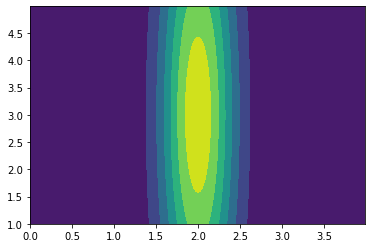

In [14]:
cov = [[0.1, 0.0], [0.0, 9.0]]
rv = multivariate_normal(mean, cov)
contourf(x, y, rv.pdf(pos))
plt.show()

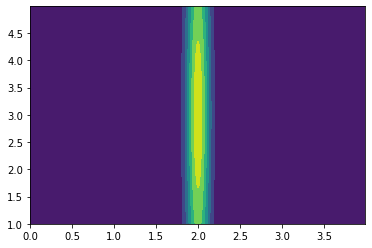

In [15]:
cov = [[0.01, 0.0], [0.0, 9.0]]
rv = multivariate_normal(mean, cov)
contourf(x, y, rv.pdf(pos))
plt.show()

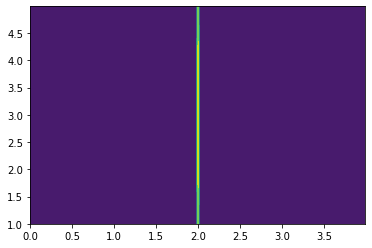

In [16]:
cov = [[0.0001, 0.0], [0.0, 9.0]]
rv = multivariate_normal(mean, cov)
contourf(x, y, rv.pdf(pos))
plt.show()

So, as seen above, the level curves of the pdf are either ellipses or lines. If the level curves are lines, the covariance matrix has an eigenvalue of 0 ($\Sigma_{11}=0$ if the lines are parallel to the $x_2$-axis, or $\Sigma_{22}=0$ if the lines are parallel to the $x_1$-axis).

# c) {-}

Let's consider the moment generating function of $X+Y.$

$$\phi_{X+Y}=\mathbb{E}[e^{t^T(X+Y)}]$$

$$=\mathbb{E}[e^{t^TX+t^TY}]$$

$$=\mathbb{E}[e^{t^TX}e^{t^TY}]$$

$$=\mathbb{E}[e^{t^TX}]\mathbb{E}[e^{t^TY}] ~ \text{because}~ X, Y~ \text{are independent}$$

$$=e^{\mu^T t +\frac{1}{2}t^T\Sigma t}e^{\mu^{'T} t +\frac{1}{2}t^T\Sigma{'} t}$$

$$=e^{\mu^T t +\frac{1}{2}t^T\Sigma t + \mu^{'T} t +\frac{1}{2}t^T\Sigma{'} t}$$

$$=e^{(\mu+\mu^{'})^T t +\frac{1}{2}t^T(\Sigma + \Sigma^{'}) t}$$

The above is the moment generating function of a multivariate normal with mean $\mu + \mu^{'}$ and covariance $\Sigma + \Sigma^{'}$. Since no two distinct distributions can have the same moment generating function it must be that $X+Y \sim N(\mu + \mu^{'}, \Sigma + \Sigma^{'}).$ So the mean of $X+Y$ is $\mu + \mu^{'}$ and the covariance of $X+Y$ is $\Sigma + \Sigma^{'}$.

Suppose $X \in \mathbb{R}^n$ and $M \in \mathbb{R}^{n \times n}, X \sim N(\mu, \Sigma).$ <br>
From a theorem seen in class we know $MX$ is a multivariate normal since $M$ is a linear transformation. <br>
We need to find the mean and covariance of $MX.$
$$\mathbb{E}[MX]=M\mathbb{E}[X]=M\mu.$$

$$\text{cov}(MX, MX)= \mathbb{E}[(MX-M\mu)(MX-M\mu)^T]$$
$$=\mathbb{E}[M(X-\mu)(M(X-\mu))^T]$$
$$=\mathbb{E}[M(X-\mu)((X-\mu)^TM^T]$$
$$=M\mathbb{E}[(X-\mu)((X-\mu)^T]M^T$$
$$=M\Sigma M^T$$